# Water Potability Using Random Forest 

In [39]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier



In [3]:
# read in the data and info
data = pd.read_csv('water_potability.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [4]:
# remove missing values
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2011 entries, 3 to 3271
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2011 non-null   float64
 1   Hardness         2011 non-null   float64
 2   Solids           2011 non-null   float64
 3   Chloramines      2011 non-null   float64
 4   Sulfate          2011 non-null   float64
 5   Conductivity     2011 non-null   float64
 6   Organic_carbon   2011 non-null   float64
 7   Trihalomethanes  2011 non-null   float64
 8   Turbidity        2011 non-null   float64
 9   Potability       2011 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 172.8 KB


## Explore The Data 

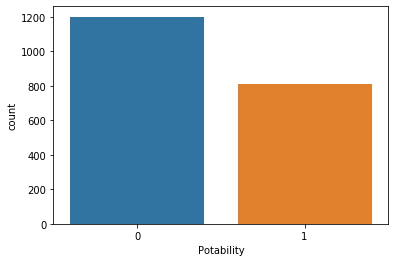

In [37]:
# count plot
sns.countplot(x=data["Potability"])


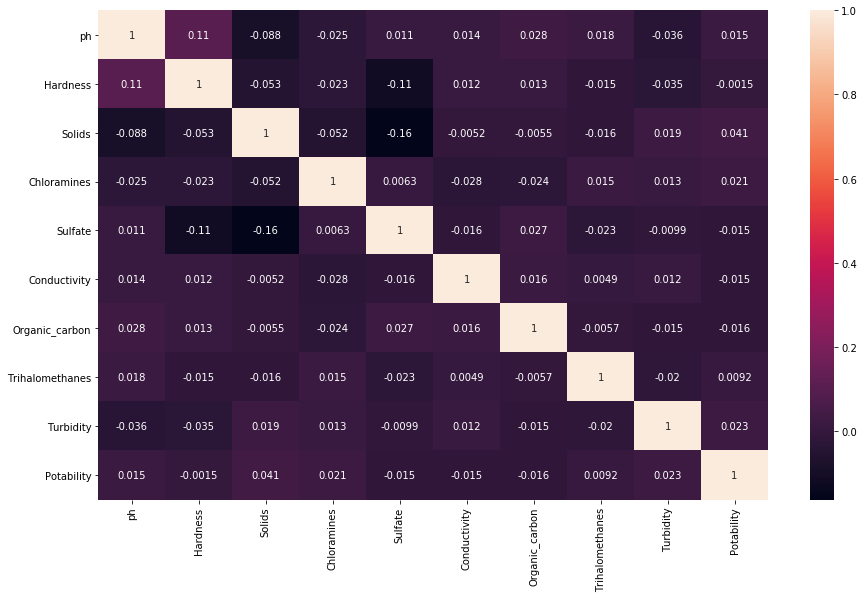

In [8]:
# correlation of the features
plt.figure(figsize = (15,9))
sns.heatmap(data.corr(), annot = True)

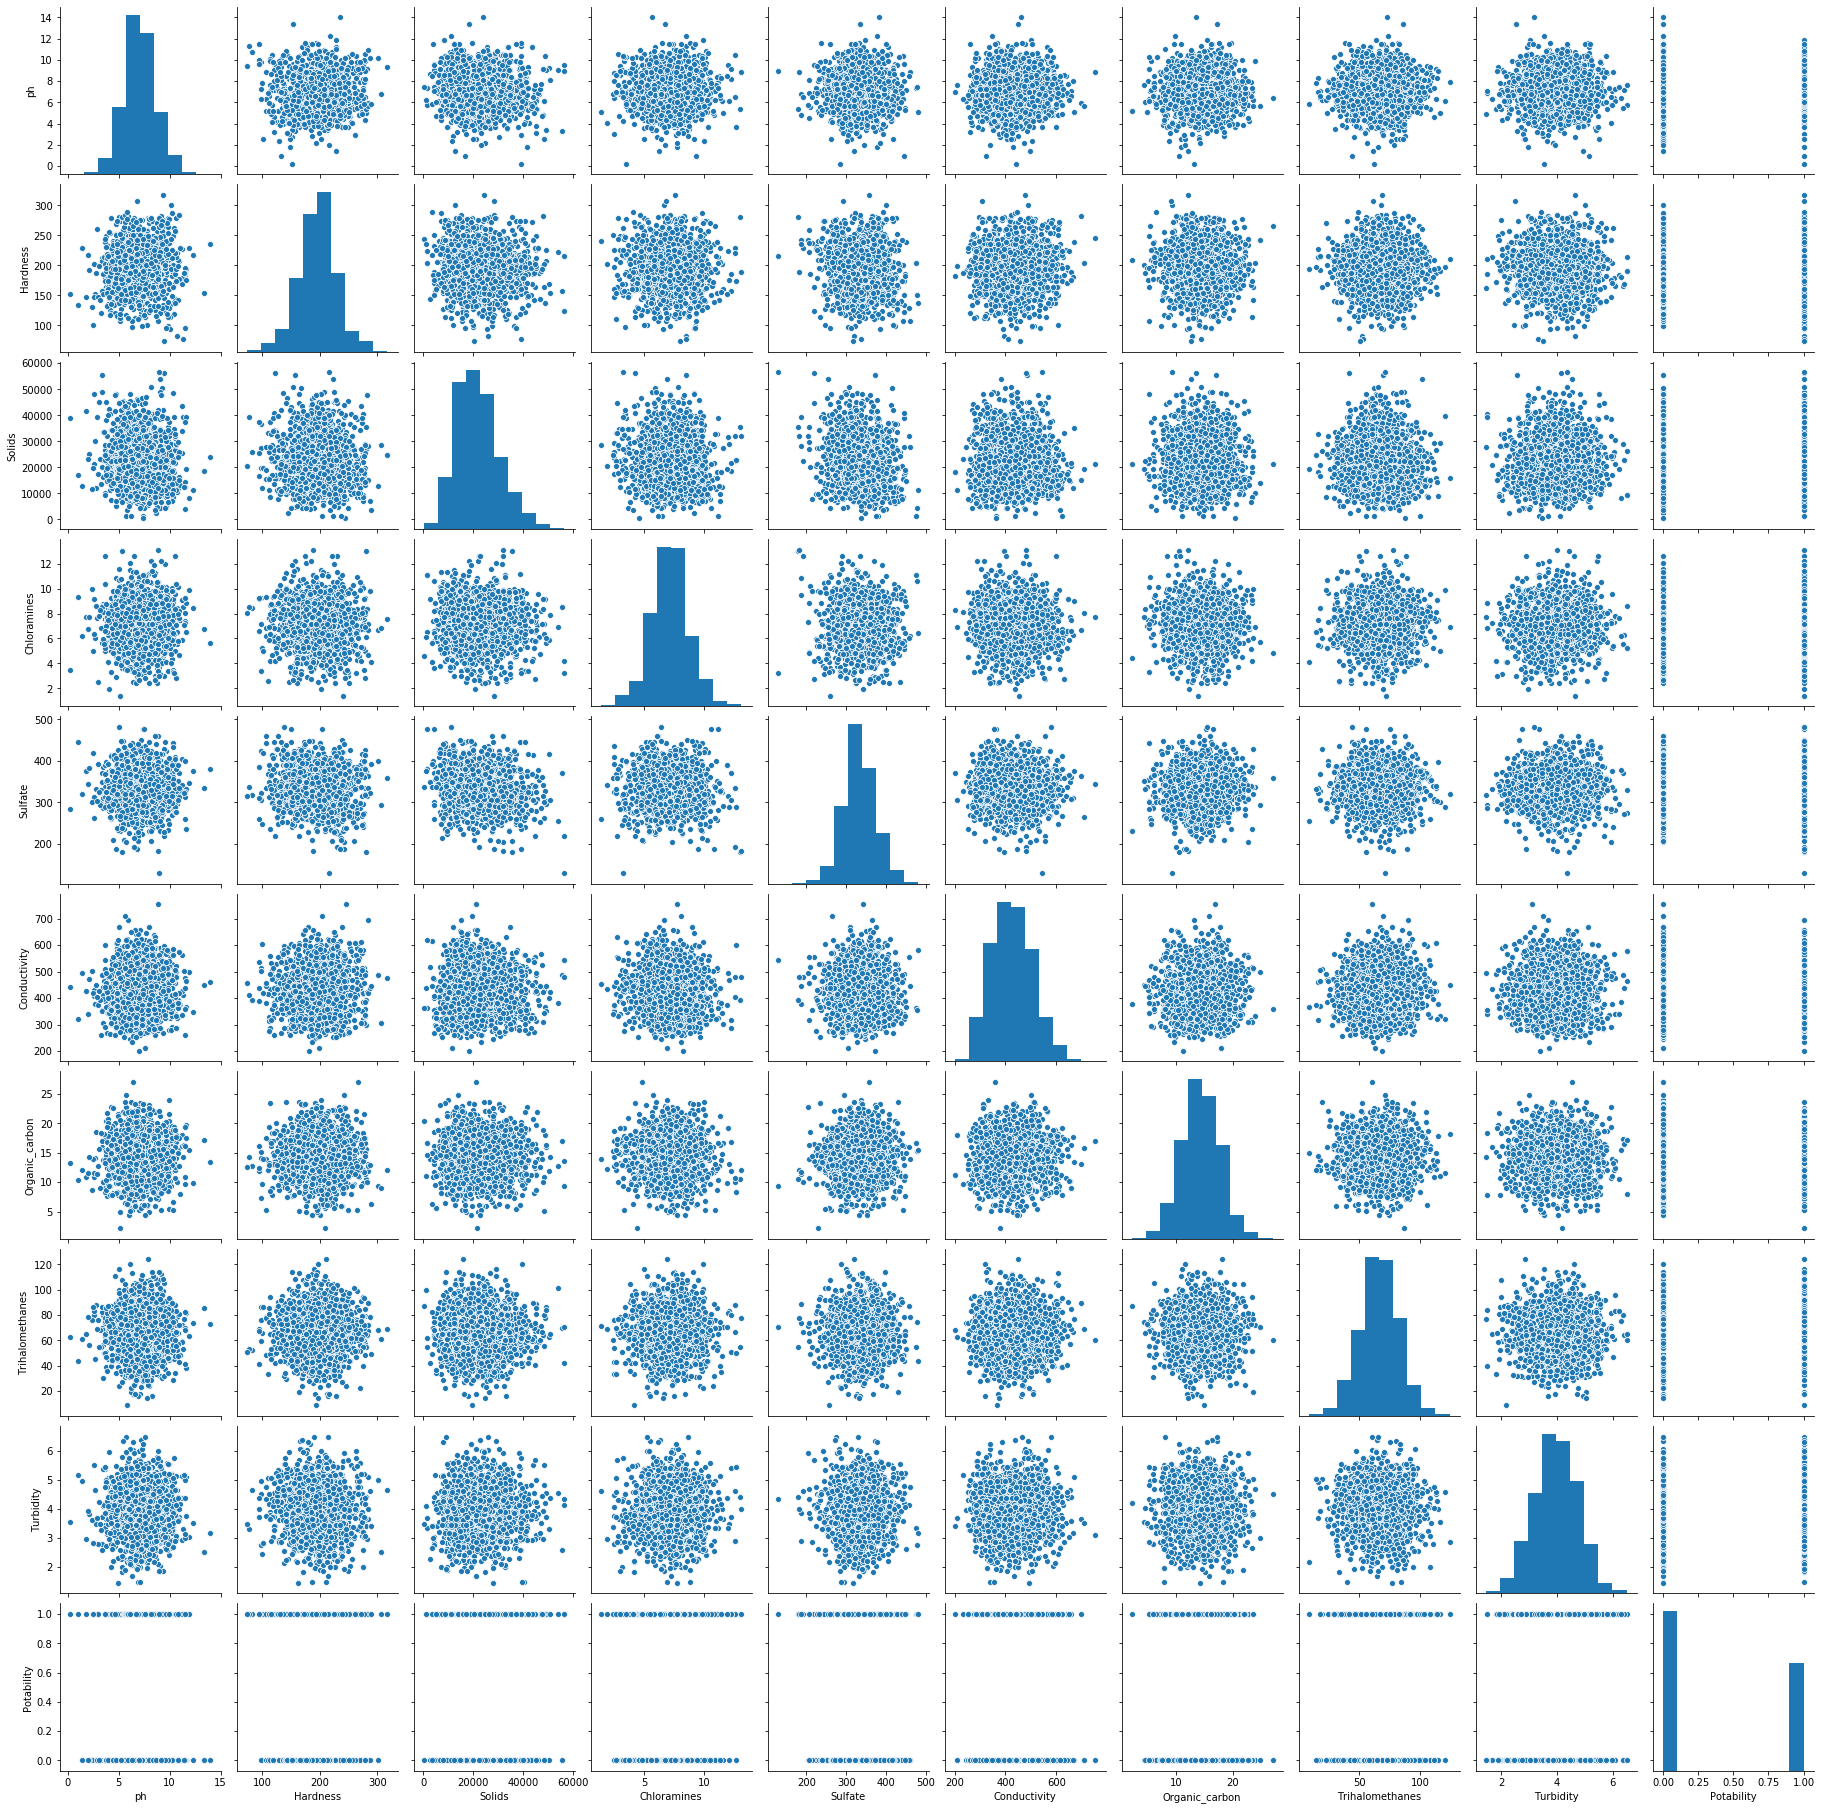

In [35]:
# pairplot the features
sns.pairplot(data = data)

## Random Forest Model 

In [23]:
# split to train and test
X = data.drop(['Potability'], axis = 1)
y = data['Potability']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=200)


In [24]:
# scale the data
sc = StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)


In [25]:
# build the model
model = RandomForestClassifier(n_estimators=300, max_features='sqrt', random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [33]:
# report the accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.6724565756823822


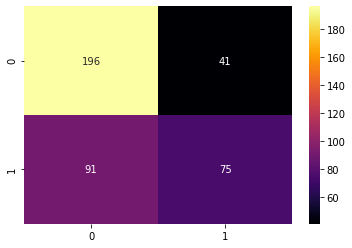

In [27]:
# confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="inferno")

In [28]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.83      0.75       237
           1       0.65      0.45      0.53       166

    accuracy                           0.67       403
   macro avg       0.66      0.64      0.64       403
weighted avg       0.67      0.67      0.66       403

